In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [174]:
file = "Resources/netflix_genre.csv"
happiness_file = "Resources/happiness_index_2021.csv"

In [175]:
Netflix_genre = pd.read_csv(file, encoding="ISO-8859-1")
Happiness_index = pd.read_csv(happiness_file, encoding="ISO-8859-1")

In [176]:
Netflix_genre

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,IMDb Votes
0,Lets Fight Ghost,Crime,"Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,R,7.9,98.0,82.0,74.0,57.0,2122065.0,12/12/2008 0:00,3/4/2021 0:00,205926.0
1,Lets Fight Ghost,Drama,"Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,R,7.9,98.0,82.0,74.0,57.0,2122065.0,12/12/2008 0:00,3/4/2021 0:00,205926.0
2,Lets Fight Ghost,Fantasy,"Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,R,7.9,98.0,82.0,74.0,57.0,2122065.0,12/12/2008 0:00,3/4/2021 0:00,205926.0
3,Lets Fight Ghost,Horror,"Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,R,7.9,98.0,82.0,74.0,57.0,2122065.0,12/12/2008 0:00,3/4/2021 0:00,205926.0
4,Lets Fight Ghost,Romance,"Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,R,7.9,98.0,82.0,74.0,57.0,2122065.0,12/12/2008 0:00,3/4/2021 0:00,205926.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26214,Brand New Day,Music,"Australian Comedies,Romantic Comedies,Australi...",English,Movie,8.6,Australia,1-2 hour,NaN,7.3,NaN,NaN,NaN,NaN,NaN,9/17/1988 0:00,4/14/2015 0:00,14.0
26215,Daniel Arends: Blessuretijd,Comedy,"Stand-up Comedy,International Movies,Comedies",Dutch,Movie,8.8,Belgium,1-2 hour,NaN,7.8,NaN,NaN,NaN,NaN,NaN,1/13/2012 0:00,4/14/2015 0:00,174.0
26216,DreamWorks Happy Holidays from Madagascar,Animation,"TV Comedies,Kids TV,Animal Tales,TV Cartoons,T...",English,Series,8.4,"Belgium,Switzerland,United States,Germany,Unit...",< 30 minutes,NaN,6.8,NaN,NaN,NaN,NaN,NaN,NaN,4/14/2015 0:00,71.0
26217,DreamWorks Happy Holidays from Madagascar,Comedy,"TV Comedies,Kids TV,Animal Tales,TV Cartoons,T...",English,Series,8.4,"Belgium,Switzerland,United States,Germany,Unit...",< 30 minutes,NaN,6.8,NaN,NaN,NaN,NaN,NaN,NaN,4/14/2015 0:00,71.0


In [288]:
Netflix_df = Netflix_genre.drop(["Languages", "Series or Movie","Runtime", "Boxoffice","Tags", "Release Date", "Netflix Release Date", "View Rating"], axis=1)
Netflix_df = Netflix_df.sort_values(by="Genre", ascending=True) 
Netflix_df = Netflix_df.dropna(how="any") 
netflix_mean = Netflix_df.groupby(by="Genre")[['Hidden Gem Score', 'IMDb Score', 'Rotten Tomatoes Score', 'Metacritic Score']].mean() 
netflix_mean = netflix_mean.sort_values(by=['Hidden Gem Score', 'IMDb Score', 'Rotten Tomatoes Score', 'Metacritic Score'], ascending=False)
netflix_mean

,Hidden Gem Score,IMDb Score,Rotten Tomatoes Score,Metacritic Score
Genre,,,,
Documentary,6.346154,7.368376,90.521368,74.606838
News,5.200000,7.720000,94.200000,78.800000
Music,4.343617,6.989362,75.755319,66.382979
History,4.262025,7.233544,76.740506,69.284810
Biography,4.152500,7.195714,76.528571,67.760714
Western,4.050909,7.060000,78.218182,69.145455
Drama,3.978226,7.020497,73.256720,66.042339
War,3.960484,7.273387,74.193548,68.250000
Animation,3.802055,6.933562,73.849315,63.910959


<AxesSubplot:xlabel='Genre'>

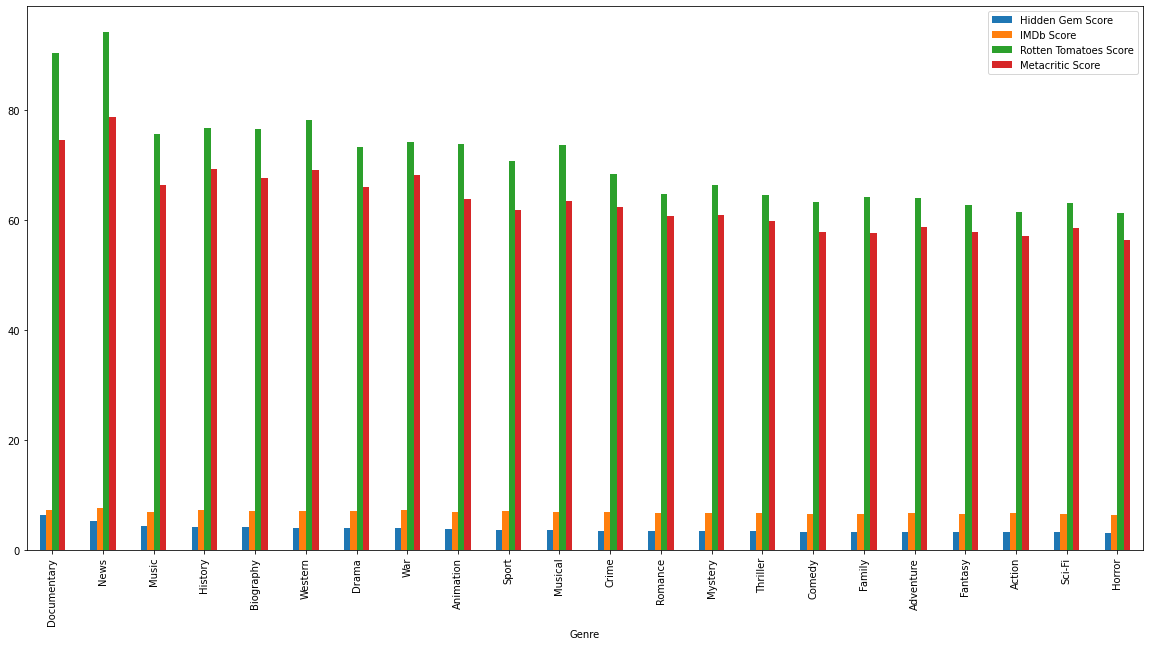

In [291]:
netflix_mean.plot(kind = "bar", figsize=(20, 10)) 

In [182]:
clean_netflix = Netflix_genre.drop(["Hidden Gem Score", "IMDb Score", "Rotten Tomatoes Score", "Metacritic Score", "Awards Received","Awards Nominated For", "Boxoffice", "IMDb Votes","Tags"], axis=1)
clean_netflix = clean_netflix.sort_values(by="Genre", ascending=True) 
clean_netflix = clean_netflix.dropna(how="any") 
clean_netflix = clean_netflix.rename(columns={'Country Availability': 'Country'}) 
Genre_country = clean_netflix[['Title', 'Genre', 'Country']]
Genre_country

,Title,Genre,Country
12081,Seraph of the End,Action,"Japan,Hong Kong,South Korea,Portugal,Thailand,..."
7631,The Witch: Part 1 - The Subversion,Action,"Argentina,Spain,United States,Japan,Canada,Bra..."
16446,Fury,Action,"Canada,India,South Korea,Romania,Hungary,Russi..."
7633,The Negotiation,Action,"Brazil,Spain,Argentina,Mexico,Colombia,South K..."
7636,Monstrum,Action,"Brazil,Spain,Argentina,Mexico,Colombia"
...,...,...,...
15738,Bone Tomahawk,Western,"Belgium,Netherlands,Australia"
10125,Hostiles,Western,"Canada,Turkey,United Kingdom,Germany"
2123,High & Low The Movie 3 / Final Mission,Western,"India,United Kingdom,United States,Australia,H..."
4316,Brimstone,Western,"France,Canada"


In [202]:
Genre_title = Genre_country.groupby("Genre")
Genre_count = Genre_title.nunique()["Title"]
Genre_count = Genre_count.sort_values(ascending=False) 
Total_title = pd.DataFrame({"Total Titles": Genre_count})
Total_title

,Total Titles
Genre,
Drama,3428
Comedy,2319
Action,1829
Thriller,1812
Crime,1229
Romance,1204
Adventure,1146
Fantasy,968
Animation,831


Text(0.5, 1.0, 'Total Number of Titles Per Genre')

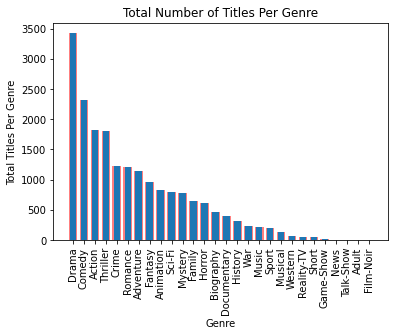

In [242]:
Titles_amount = [3428, 2319, 1829, 1812, 1229, 1204, 1146, 968, 831, 790, 776, 647, 613, 467, 391, 320, 232, 212, 204, 127, 75, 56, 52, 17, 9, 7, 1, 1]
x_axis = np.arange(len(Titles_amount))
plt.bar(x_axis, Titles_amount, color='r', alpha=0.5, align="center") 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Drama", "Comedy", "Action", "Thriller", "Crime", "Romance", "Adventure", "Fantasy", "Animation", "Sci-Fi", "Mystery", "Family", "Horror", "Biography", "Documentary", "History", "War", "Music", "Sport", "Musical", "Western", "Reality-TV", "Short", "Game-Show", "News", "Talk-Show", "Adult", "Film-Noir"])
plt.bar(x_axis, Titles_amount, width = 0.6)
plt.xticks(x_axis, rotation = 90)
plt.xlabel("Genre")
plt.ylabel("Total Titles Per Genre")
plt.title("Total Number of Titles Per Genre") 